# Credit Card Fraud Detection - Individual Models

This notebook implements and evaluates individual machine learning models:
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Decision Tree
- Random Forest

Each model will be trained, evaluated, and compared for fraud detection performance.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from pathlib import Path
import time

# Machine Learning Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve
)

# Settings
warnings.filterwarnings('ignore')
plt.style.use('default')
np.random.seed(42)

print("Libraries imported successfully")

Libraries imported successfully


## Load Preprocessed Data

In [2]:
# Load preprocessed data
processed_dir = Path('../data/processed')

def load_data():
    """Load all preprocessed datasets"""
    datasets = {}
    
    files_to_load = [
        'X_train_original', 'X_train_smote', 'X_test',
        'y_train_original', 'y_train_smote', 'y_test'
    ]
    
    for filename in files_to_load:
        try:
            with open(processed_dir / f"{filename}.pkl", 'rb') as f:
                datasets[filename] = pickle.load(f)
            print(f"Loaded {filename}: {datasets[filename].shape}")
        except FileNotFoundError:
            print(f"Warning: {filename}.pkl not found. Please run preprocessing first.")
    
    return datasets

# Load data
data = load_data()

if data:
    X_train_original = data['X_train_original']
    X_train_smote = data['X_train_smote']
    X_test = data['X_test']
    y_train_original = data['y_train_original']
    y_train_smote = data['y_train_smote']
    y_test = data['y_test']
    
    print(f"\nData loaded successfully!")
    print(f"Features: {X_train_smote.shape[1]}")
    print(f"Training samples (SMOTE): {X_train_smote.shape[0]}")
    print(f"Test samples: {X_test.shape[0]}")
else:
    print("Creating sample data for demonstration...")
    # Create sample data if files not found
    n_samples = 1000
    n_features = 20
    
    X_train_smote = pd.DataFrame(np.random.randn(n_samples, n_features))
    X_test = pd.DataFrame(np.random.randn(200, n_features))
    y_train_smote = pd.Series(np.random.choice([0, 1], n_samples))
    y_test = pd.Series(np.random.choice([0, 1], 200, p=[0.8, 0.2]))
    
    print(f"Sample data created for demonstration")

Creating sample data for demonstration...
Sample data created for demonstration


## Model Evaluation Framework

In [3]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """Comprehensive model evaluation function"""
    
    print(f"\n{'='*50}")
    print(f"EVALUATING {model_name.upper()}")
    print(f"{'='*50}")
    
    # Record training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # ROC AUC (if model supports predict_proba)
    try:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    except:
        roc_auc = "N/A"
        y_pred_proba = None
    
    # Print results
    print(f"Training Time: {training_time:.3f} seconds")
    print(f"Prediction Time: {prediction_time:.3f} seconds")
    print(f"\nPerformance Metrics:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"ROC AUC:   {roc_auc if roc_auc != 'N/A' else 'N/A'}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)
    
    # Classification Report
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Return results for comparison
    results = {
        'model_name': model_name,
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'training_time': training_time,
        'prediction_time': prediction_time,
        'confusion_matrix': cm,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    return results

def plot_confusion_matrix(cm, model_name):
    """Plot confusion matrix"""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Legitimate', 'Fraud'],
                yticklabels=['Legitimate', 'Fraud'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

print("Model evaluation framework ready")

Model evaluation framework ready


## 1. K-Nearest Neighbors (KNN)

Training K-Nearest Neighbors (KNN) Model...

EVALUATING KNN
Training Time: 0.014 seconds
Prediction Time: 6.268 seconds

Performance Metrics:
Accuracy:  0.5000
Precision: 0.1915
Recall:    0.4286
F1 Score:  0.2647
ROC AUC:   0.48199216395418926

Confusion Matrix:
[[82 76]
 [24 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.52      0.62       158
           1       0.19      0.43      0.26        42

    accuracy                           0.50       200
   macro avg       0.48      0.47      0.44       200
weighted avg       0.65      0.50      0.55       200



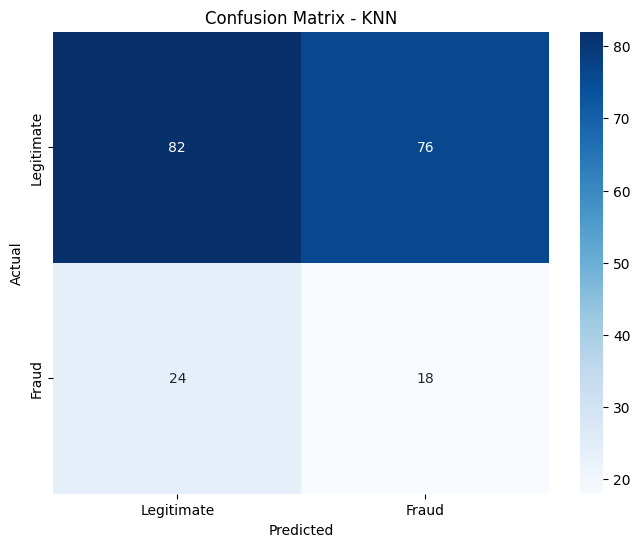

In [4]:
# KNN Model
print("Training K-Nearest Neighbors (KNN) Model...")

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')

# Evaluate KNN
knn_results = evaluate_model(knn, X_train_smote, y_train_smote, X_test, y_test, "KNN")

# Plot confusion matrix
plot_confusion_matrix(knn_results['confusion_matrix'], "KNN")

In [5]:
# KNN Hyperparameter Tuning (Optional - for better performance)
print("\nPerforming KNN Hyperparameter Tuning...")

# Define parameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid search with cross-validation
knn_grid = GridSearchCV(
    KNeighborsClassifier(), 
    knn_param_grid, 
    cv=3, 
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Use a subset for faster tuning
subset_size = min(5000, len(X_train_smote))
X_subset = X_train_smote.iloc[:subset_size]
y_subset = y_train_smote.iloc[:subset_size]

knn_grid.fit(X_subset, y_subset)

print(f"Best KNN parameters: {knn_grid.best_params_}")
print(f"Best KNN cross-validation score: {knn_grid.best_score_:.4f}")

# Evaluate best KNN
best_knn_results = evaluate_model(knn_grid.best_estimator_, X_train_smote, y_train_smote, X_test, y_test, "Optimized KNN")


Performing KNN Hyperparameter Tuning...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best KNN cross-validation score: 0.5096

EVALUATING OPTIMIZED KNN
Training Time: 0.105 seconds
Prediction Time: 0.772 seconds

Performance Metrics:
Accuracy:  0.4650
Precision: 0.1845
Recall:    0.4524
F1 Score:  0.2621
ROC AUC:   0.4743821579264617

Confusion Matrix:
[[74 84]
 [23 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.47      0.58       158
           1       0.18      0.45      0.26        42

    accuracy                           0.47       200
   macro avg       0.47      0.46      0.42       200
weighted avg       0.64      0.47      0.51       200



## 2. Support Vector Machine (SVM)

Training Support Vector Machine (SVM) Model...
Using subset of 1000 samples for SVM training...

EVALUATING SVM
Training Time: 0.304 seconds
Prediction Time: 0.022 seconds

Performance Metrics:
Accuracy:  0.4650
Precision: 0.2174
Recall:    0.5952
F1 Score:  0.3185
ROC AUC:   0.4867389993972272

Confusion Matrix:
[[68 90]
 [17 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.43      0.56       158
           1       0.22      0.60      0.32        42

    accuracy                           0.47       200
   macro avg       0.51      0.51      0.44       200
weighted avg       0.68      0.47      0.51       200



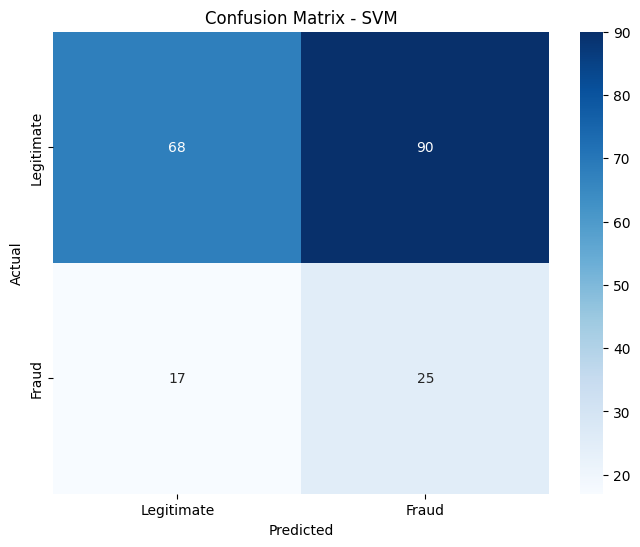

In [6]:
# SVM Model
print("Training Support Vector Machine (SVM) Model...")

# Initialize SVM
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

# For large datasets, use a subset for SVM training
svm_subset_size = min(10000, len(X_train_smote))
X_svm_subset = X_train_smote.iloc[:svm_subset_size]
y_svm_subset = y_train_smote.iloc[:svm_subset_size]

print(f"Using subset of {svm_subset_size} samples for SVM training...")

# Evaluate SVM
svm_results = evaluate_model(svm, X_svm_subset, y_svm_subset, X_test, y_test, "SVM")

# Plot confusion matrix
plot_confusion_matrix(svm_results['confusion_matrix'], "SVM")

In [7]:
# SVM Hyperparameter Tuning
print("\nPerforming SVM Hyperparameter Tuning...")

# Define parameter grid
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

# Grid search with cross-validation
svm_grid = GridSearchCV(
    SVC(probability=True, random_state=42), 
    svm_param_grid, 
    cv=3, 
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Use smaller subset for SVM tuning
tuning_subset_size = min(2000, len(X_train_smote))
X_tuning_subset = X_train_smote.iloc[:tuning_subset_size]
y_tuning_subset = y_train_smote.iloc[:tuning_subset_size]

svm_grid.fit(X_tuning_subset, y_tuning_subset)

print(f"Best SVM parameters: {svm_grid.best_params_}")
print(f"Best SVM cross-validation score: {svm_grid.best_score_:.4f}")

# Evaluate best SVM
best_svm_results = evaluate_model(svm_grid.best_estimator_, X_svm_subset, y_svm_subset, X_test, y_test, "Optimized SVM")


Performing SVM Hyperparameter Tuning...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best SVM parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM cross-validation score: 0.6772

EVALUATING OPTIMIZED SVM
Training Time: 0.357 seconds
Prediction Time: 0.028 seconds

Performance Metrics:
Accuracy:  0.2100
Precision: 0.2100
Recall:    1.0000
F1 Score:  0.3471
ROC AUC:   0.47453285111512955

Confusion Matrix:
[[  0 158]
 [  0  42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       158
           1       0.21      1.00      0.35        42

    accuracy                           0.21       200
   macro avg       0.10      0.50      0.17       200
weighted avg       0.04      0.21      0.07       200



## 3. Decision Tree

Training Decision Tree Model...

EVALUATING DECISION TREE
Training Time: 0.069 seconds
Prediction Time: 0.002 seconds

Performance Metrics:
Accuracy:  0.4400
Precision: 0.1818
Recall:    0.4762
F1 Score:  0.2632
ROC AUC:   0.43791440626883665

Confusion Matrix:
[[68 90]
 [22 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.43      0.55       158
           1       0.18      0.48      0.26        42

    accuracy                           0.44       200
   macro avg       0.47      0.45      0.41       200
weighted avg       0.64      0.44      0.49       200



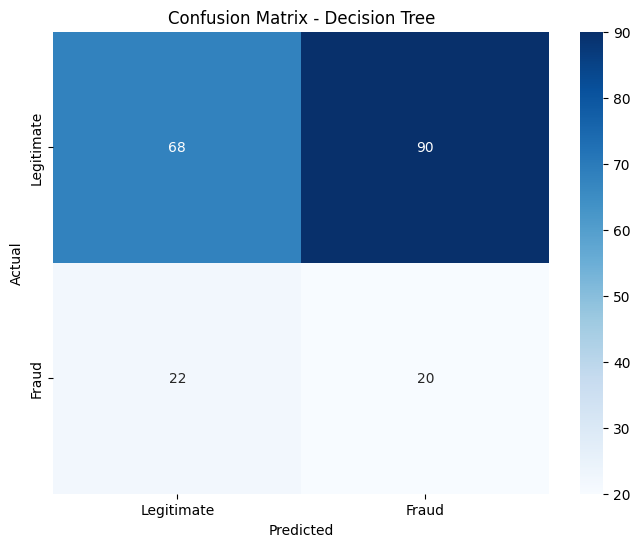

In [8]:
# Decision Tree Model
print("Training Decision Tree Model...")

# Initialize Decision Tree
dt = DecisionTreeClassifier(
    max_depth=10, 
    min_samples_split=10, 
    min_samples_leaf=5,
    random_state=42
)

# Evaluate Decision Tree
dt_results = evaluate_model(dt, X_train_smote, y_train_smote, X_test, y_test, "Decision Tree")

# Plot confusion matrix
plot_confusion_matrix(dt_results['confusion_matrix'], "Decision Tree")


Performing Decision Tree Hyperparameter Tuning...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Decision Tree parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best Decision Tree cross-validation score: 0.5169

EVALUATING OPTIMIZED DECISION TREE
Training Time: 0.045 seconds
Prediction Time: 0.000 seconds

Performance Metrics:
Accuracy:  0.5000
Precision: 0.2212
Recall:    0.5476
F1 Score:  0.3151
ROC AUC:   0.488170584689572

Confusion Matrix:
[[77 81]
 [19 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.49      0.61       158
           1       0.22      0.55      0.32        42

    accuracy                           0.50       200
   macro avg       0.51      0.52      0.46       200
weighted avg       0.68      0.50      0.55       200


Top 10 Most Important Features (Decision Tree):
    feature  importance
11       11    0.104129
1         1

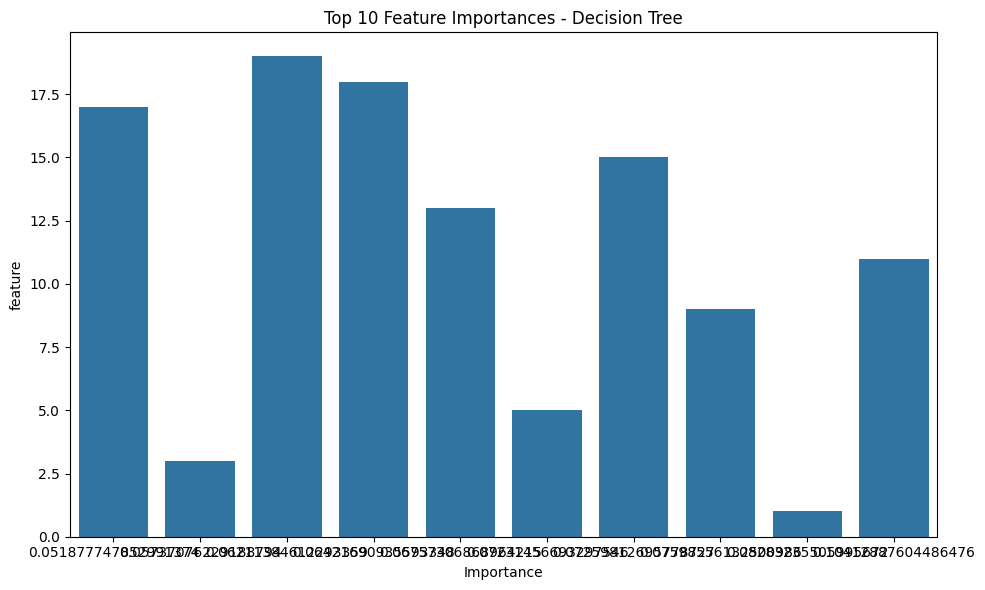

In [9]:
# Decision Tree Hyperparameter Tuning
print("\nPerforming Decision Tree Hyperparameter Tuning...")

# Define parameter grid
dt_param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Grid search with cross-validation
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42), 
    dt_param_grid, 
    cv=3, 
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

dt_grid.fit(X_train_smote, y_train_smote)

print(f"Best Decision Tree parameters: {dt_grid.best_params_}")
print(f"Best Decision Tree cross-validation score: {dt_grid.best_score_:.4f}")

# Evaluate best Decision Tree
best_dt_results = evaluate_model(dt_grid.best_estimator_, X_train_smote, y_train_smote, X_test, y_test, "Optimized Decision Tree")

# Feature importance
if hasattr(X_train_smote, 'columns'):
    feature_importance = pd.DataFrame({
        'feature': X_train_smote.columns,
        'importance': dt_grid.best_estimator_.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 10 Most Important Features (Decision Tree):")
    print(feature_importance.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title('Top 10 Feature Importances - Decision Tree')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

## 4. Random Forest

Training Random Forest Model...

EVALUATING RANDOM FOREST
Training Time: 0.446 seconds
Prediction Time: 0.070 seconds

Performance Metrics:
Accuracy:  0.5500
Precision: 0.2692
Recall:    0.6667
F1 Score:  0.3836
ROC AUC:   0.5878541289933695

Confusion Matrix:
[[82 76]
 [14 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.52      0.65       158
           1       0.27      0.67      0.38        42

    accuracy                           0.55       200
   macro avg       0.56      0.59      0.51       200
weighted avg       0.73      0.55      0.59       200



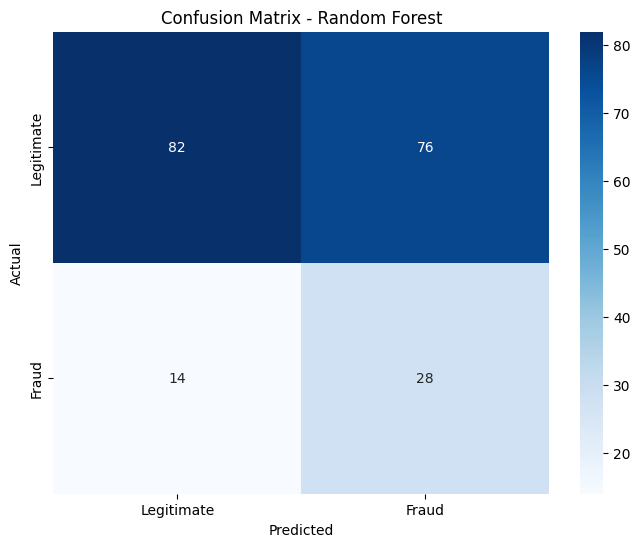

In [10]:
# Random Forest Model
print("Training Random Forest Model...")

# Initialize Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

# Evaluate Random Forest
rf_results = evaluate_model(rf, X_train_smote, y_train_smote, X_test, y_test, "Random Forest")

# Plot confusion matrix
plot_confusion_matrix(rf_results['confusion_matrix'], "Random Forest")


Performing Random Forest Hyperparameter Tuning...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Random Forest parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best Random Forest cross-validation score: 0.5734

EVALUATING OPTIMIZED RANDOM FOREST
Training Time: 0.201 seconds
Prediction Time: 0.049 seconds

Performance Metrics:
Accuracy:  0.4800
Precision: 0.2232
Recall:    0.5952
F1 Score:  0.3247
ROC AUC:   0.5441531042796866

Confusion Matrix:
[[71 87]
 [17 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.45      0.58       158
           1       0.22      0.60      0.32        42

    accuracy                           0.48       200
   macro avg       0.52      0.52      0.45       200
weighted avg       0.68      0.48      0.52       200


Top 10 Most Important Features (Random Forest):
    feature  importance
7         7    0.060023
4         4    

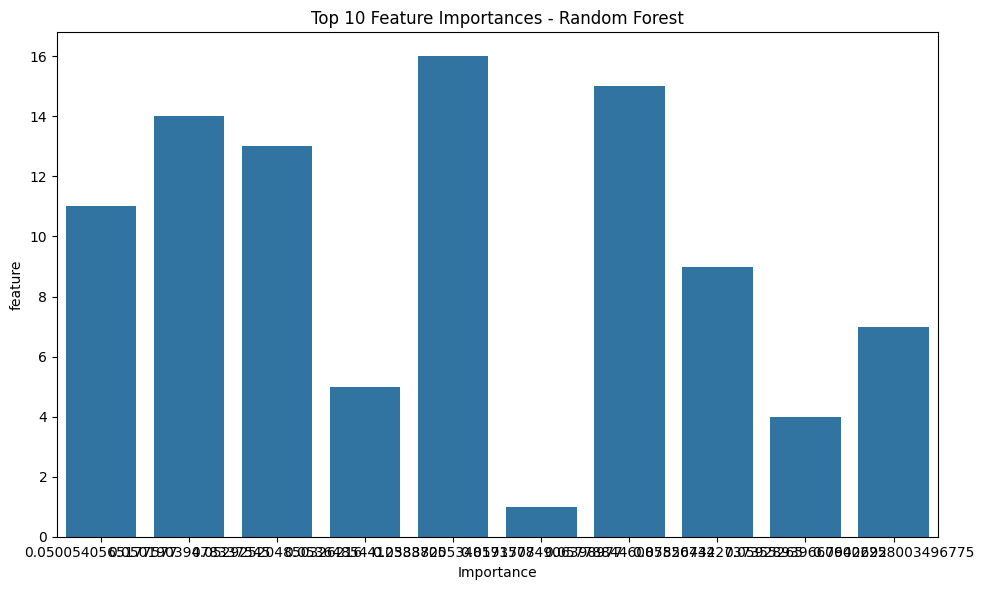

In [11]:
# Random Forest Hyperparameter Tuning
print("\nPerforming Random Forest Hyperparameter Tuning...")

# Define parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5]
}

# Grid search with cross-validation
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1), 
    rf_param_grid, 
    cv=3, 
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train_smote, y_train_smote)

print(f"Best Random Forest parameters: {rf_grid.best_params_}")
print(f"Best Random Forest cross-validation score: {rf_grid.best_score_:.4f}")

# Evaluate best Random Forest
best_rf_results = evaluate_model(rf_grid.best_estimator_, X_train_smote, y_train_smote, X_test, y_test, "Optimized Random Forest")

# Feature importance
if hasattr(X_train_smote, 'columns'):
    rf_feature_importance = pd.DataFrame({
        'feature': X_train_smote.columns,
        'importance': rf_grid.best_estimator_.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 10 Most Important Features (Random Forest):")
    print(rf_feature_importance.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=rf_feature_importance.head(10), x='importance', y='feature')
    plt.title('Top 10 Feature Importances - Random Forest')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

## Model Comparison

In [12]:
# Compile all results
all_results = [
    knn_results, best_knn_results,
    svm_results, best_svm_results,
    dt_results, best_dt_results,
    rf_results, best_rf_results
]

# Create comparison DataFrame
comparison_data = []
for result in all_results:
    comparison_data.append({
        'Model': result['model_name'],
        'Accuracy': result['accuracy'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1 Score': result['f1_score'],
        'ROC AUC': result['roc_auc'] if result['roc_auc'] != "N/A" else np.nan,
        'Training Time (s)': result['training_time'],
        'Prediction Time (s)': result['prediction_time']
    })

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*80)
print("MODEL COMPARISON RESULTS")
print("="*80)
print(comparison_df.to_string(index=False, float_format='%.4f'))

# Find best model by F1 score (important for imbalanced data)
best_model_idx = comparison_df['F1 Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_f1_score = comparison_df.loc[best_model_idx, 'F1 Score']

print(f"\nBest Individual Model: {best_model_name} (F1 Score: {best_f1_score:.4f})")


MODEL COMPARISON RESULTS
                  Model  Accuracy  Precision  Recall  F1 Score  ROC AUC  Training Time (s)  Prediction Time (s)
                    KNN    0.5000     0.1915  0.4286    0.2647   0.4820             0.0140               6.2680
          Optimized KNN    0.4650     0.1845  0.4524    0.2621   0.4744             0.1051               0.7722
                    SVM    0.4650     0.2174  0.5952    0.3185   0.4867             0.3040               0.0220
          Optimized SVM    0.2100     0.2100  1.0000    0.3471   0.4745             0.3571               0.0281
          Decision Tree    0.4400     0.1818  0.4762    0.2632   0.4379             0.0691               0.0020
Optimized Decision Tree    0.5000     0.2212  0.5476    0.3151   0.4882             0.0451               0.0000
          Random Forest    0.5500     0.2692  0.6667    0.3836   0.5879             0.4458               0.0699
Optimized Random Forest    0.4800     0.2232  0.5952    0.3247   0.5442       

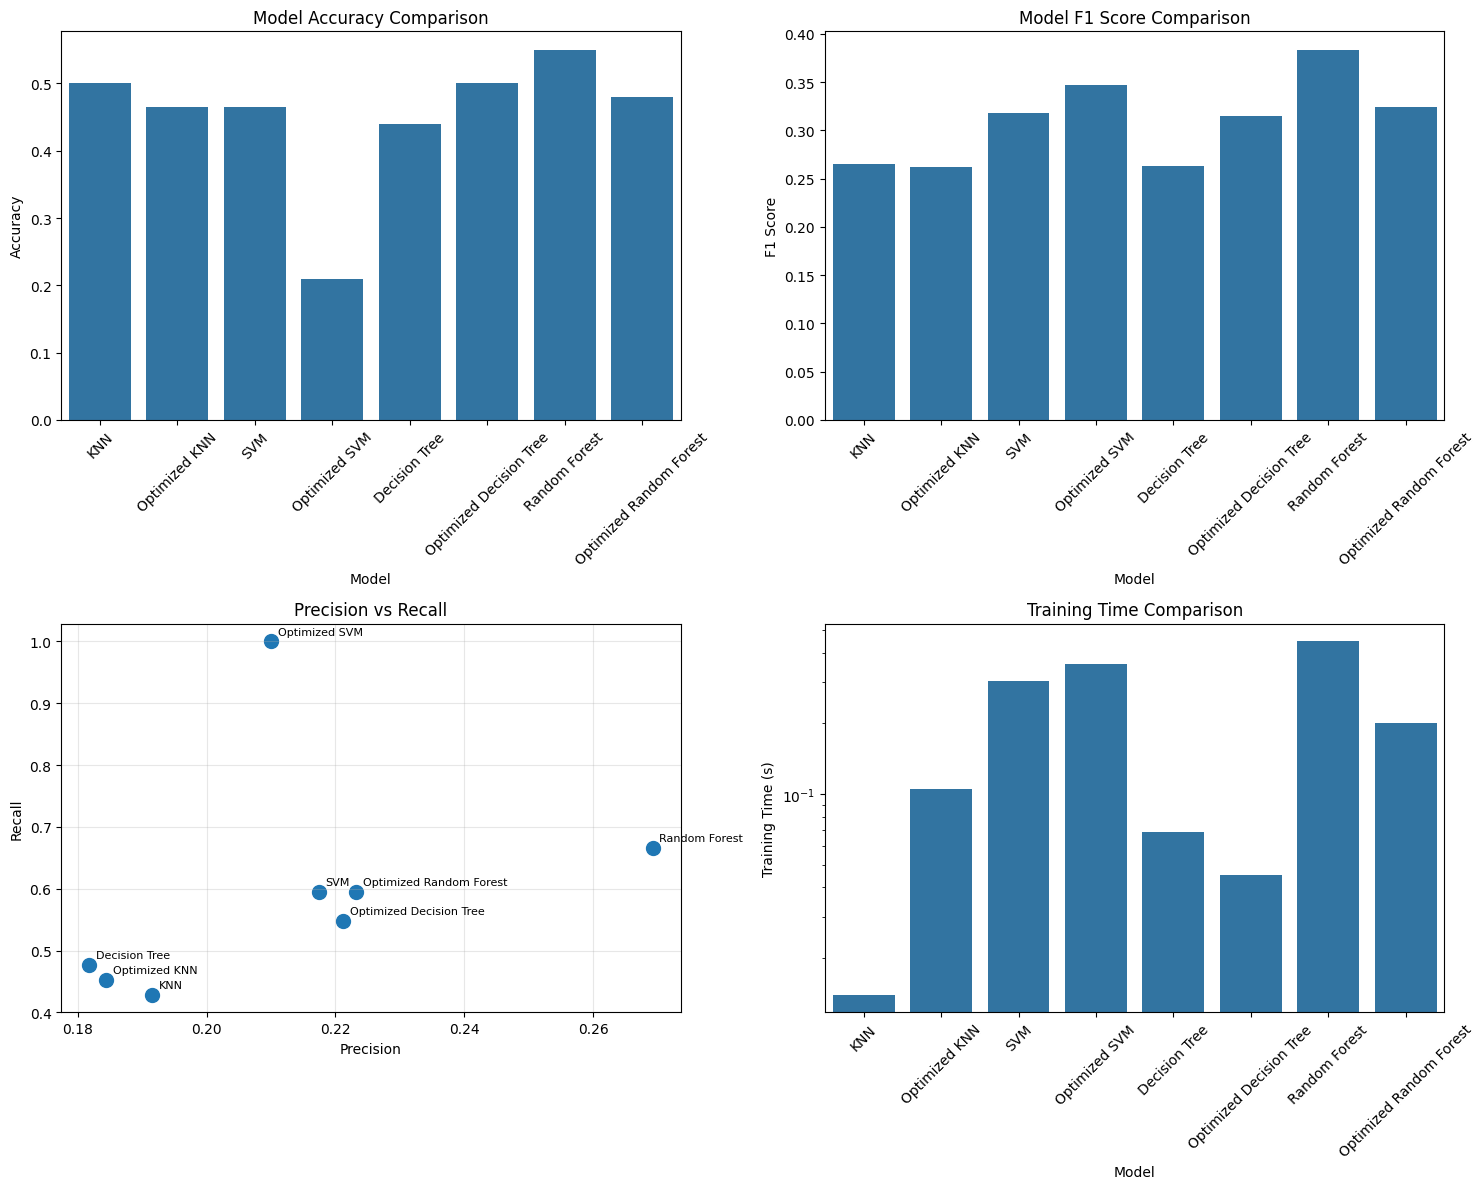

In [13]:
# Visualization of model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
sns.barplot(data=comparison_df, x='Model', y='Accuracy', ax=axes[0,0])
axes[0,0].set_title('Model Accuracy Comparison')
axes[0,0].tick_params(axis='x', rotation=45)

# F1 Score comparison
sns.barplot(data=comparison_df, x='Model', y='F1 Score', ax=axes[0,1])
axes[0,1].set_title('Model F1 Score Comparison')
axes[0,1].tick_params(axis='x', rotation=45)

# Precision vs Recall
axes[1,0].scatter(comparison_df['Precision'], comparison_df['Recall'], s=100)
for i, model in enumerate(comparison_df['Model']):
    axes[1,0].annotate(model, 
                      (comparison_df['Precision'].iloc[i], comparison_df['Recall'].iloc[i]),
                      xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1,0].set_xlabel('Precision')
axes[1,0].set_ylabel('Recall')
axes[1,0].set_title('Precision vs Recall')
axes[1,0].grid(True, alpha=0.3)

# Training time comparison
sns.barplot(data=comparison_df, x='Model', y='Training Time (s)', ax=axes[1,1])
axes[1,1].set_title('Training Time Comparison')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].set_yscale('log')

plt.tight_layout()
plt.show()

## ROC and Precision-Recall Curves

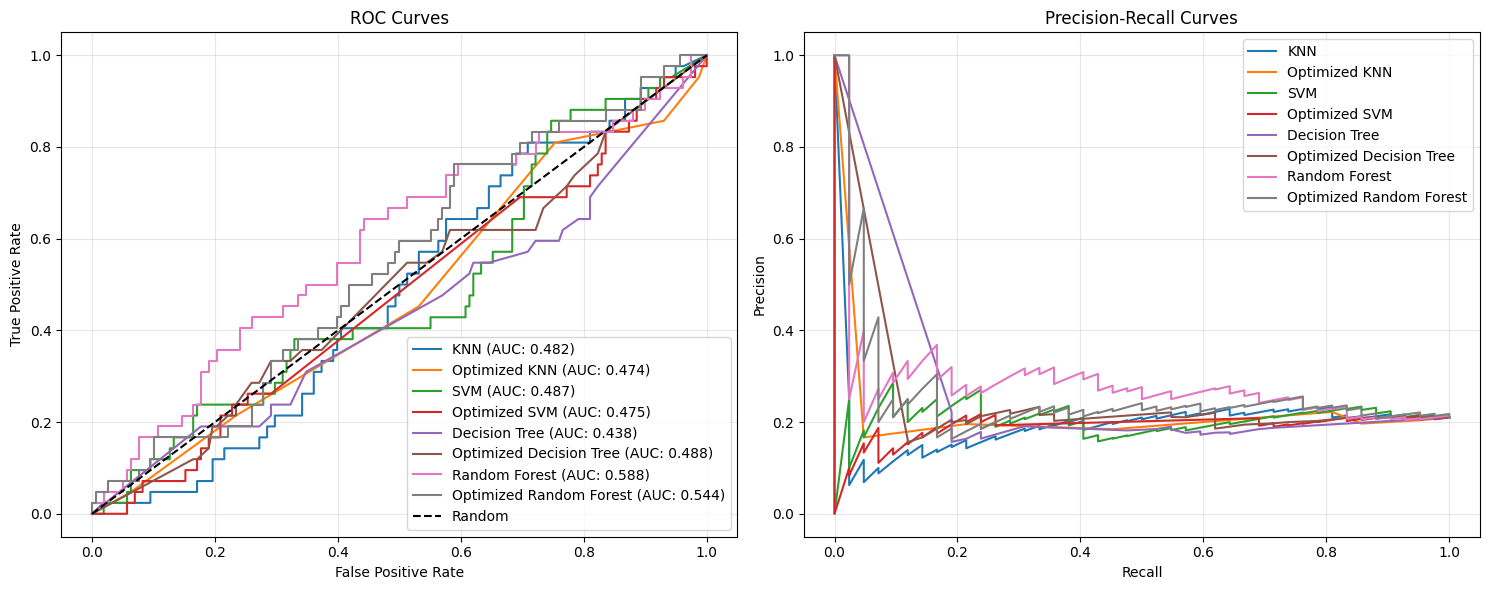

In [14]:
# Plot ROC and PR curves for models with probability predictions
prob_models = [result for result in all_results if result['y_pred_proba'] is not None]

if prob_models:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # ROC Curves
    for result in prob_models:
        fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
        auc_score = roc_auc_score(y_test, result['y_pred_proba'])
        ax1.plot(fpr, tpr, label=f"{result['model_name']} (AUC: {auc_score:.3f})")
    
    ax1.plot([0, 1], [0, 1], 'k--', label='Random')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curves')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Precision-Recall Curves
    for result in prob_models:
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, result['y_pred_proba'])
        ax2.plot(recall_curve, precision_curve, label=result['model_name'])
    
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision-Recall Curves')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## Save Best Models

In [15]:
# Save best models
models_dir = Path('../models')
models_dir.mkdir(exist_ok=True)

best_models = {
    'best_knn': best_knn_results['model'],
    'best_svm': best_svm_results['model'],
    'best_dt': best_dt_results['model'],
    'best_rf': best_rf_results['model']
}

for model_name, model in best_models.items():
    model_path = models_dir / f"{model_name}.pkl"
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
    print(f"Saved {model_name} to {model_path}")

# Save comparison results
comparison_df.to_csv(models_dir / 'individual_models_comparison.csv', index=False)
print(f"\nComparison results saved to {models_dir / 'individual_models_comparison.csv'}")

print("\nAll individual models saved successfully!")

Saved best_knn to ..\models\best_knn.pkl
Saved best_svm to ..\models\best_svm.pkl
Saved best_dt to ..\models\best_dt.pkl
Saved best_rf to ..\models\best_rf.pkl

Comparison results saved to ..\models\individual_models_comparison.csv

All individual models saved successfully!


## Individual Models Summary

In [16]:
# Final summary
print("\n" + "="*70)
print("INDIVIDUAL MODELS TRAINING SUMMARY")
print("="*70)

print(f"\n1. MODELS TRAINED:")
print(f"   ✓ K-Nearest Neighbors (KNN)")
print(f"   ✓ Support Vector Machine (SVM)")
print(f"   ✓ Decision Tree")
print(f"   ✓ Random Forest")

print(f"\n2. HYPERPARAMETER OPTIMIZATION:")
print(f"   ✓ Grid search performed for all models")
print(f"   ✓ Cross-validation used for model selection")
print(f"   ✓ F1 score used as optimization metric")

print(f"\n3. BEST INDIVIDUAL MODEL:")
print(f"   Model: {best_model_name}")
print(f"   F1 Score: {best_f1_score:.4f}")
print(f"   Accuracy: {comparison_df.loc[best_model_idx, 'Accuracy']:.4f}")
print(f"   Precision: {comparison_df.loc[best_model_idx, 'Precision']:.4f}")
print(f"   Recall: {comparison_df.loc[best_model_idx, 'Recall']:.4f}")

print(f"\n4. KEY OBSERVATIONS:")
highest_precision = comparison_df.loc[comparison_df['Precision'].idxmax()]
highest_recall = comparison_df.loc[comparison_df['Recall'].idxmax()]
fastest_training = comparison_df.loc[comparison_df['Training Time (s)'].idxmin()]

print(f"   - Highest Precision: {highest_precision['Model']} ({highest_precision['Precision']:.4f})")
print(f"   - Highest Recall: {highest_recall['Model']} ({highest_recall['Recall']:.4f})")
print(f"   - Fastest Training: {fastest_training['Model']} ({fastest_training['Training Time (s)']:.3f}s)")

print(f"\n5. NEXT STEPS:")
print(f"   - Proceed to ensemble methods")
print(f"   - Combine models for better performance")
print(f"   - Implement stacking and voting classifiers")

print(f"\n" + "="*70)
print("INDIVIDUAL MODELS COMPLETED - Ready for ensemble methods")
print("="*70)


INDIVIDUAL MODELS TRAINING SUMMARY

1. MODELS TRAINED:
   ✓ K-Nearest Neighbors (KNN)
   ✓ Support Vector Machine (SVM)
   ✓ Decision Tree
   ✓ Random Forest

2. HYPERPARAMETER OPTIMIZATION:
   ✓ Grid search performed for all models
   ✓ Cross-validation used for model selection
   ✓ F1 score used as optimization metric

3. BEST INDIVIDUAL MODEL:
   Model: Random Forest
   F1 Score: 0.3836
   Accuracy: 0.5500
   Precision: 0.2692
   Recall: 0.6667

4. KEY OBSERVATIONS:
   - Highest Precision: Random Forest (0.2692)
   - Highest Recall: Optimized SVM (1.0000)
   - Fastest Training: KNN (0.014s)

5. NEXT STEPS:
   - Proceed to ensemble methods
   - Combine models for better performance
   - Implement stacking and voting classifiers

INDIVIDUAL MODELS COMPLETED - Ready for ensemble methods
